In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
red_wine_data = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

red_wine_data['class'] = 'red'
white_wine_data['class'] = 'white'
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0, ignore_index=True)

In [3]:
wine_data['target'] = np.where(wine_data['class']=='white', 1, 0)
# wine_data.corr()['target'].sort_values(ascending=True)

In [4]:
wine_data.drop('class', axis=1, inplace=True)

In [5]:
wine_data = wine_data.astype('float64')
data_X = wine_data.drop('target', axis=1)
data_y = wine_data['target']

In [6]:
wine_data.shape

(6497, 13)

In [7]:
data_X.shape

(6497, 12)

In [8]:
data_y.shape

(6497,)

In [9]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1.0


In [10]:
# Hold out 20% of the dataset for training
size = wine_data.shape[0]
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
X_train = data_X[:-test_size].values
y_train = data_y[:-test_size].values
X_test = data_X[-test_size:].values
y_test = data_y[-test_size:].values

In [11]:
print("X train:",len(X_train))
print("X test:",len(X_test))
print("y train:",len(y_train))
print("y test:",len(y_test))

X train: 5198
X test: 1299
y train: 5198
y test: 1299


In [12]:
# X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

In [13]:
# implement Support Vector Machines
import numpy as np

class SVM:
    def __init__(self, learning_rate=10000, lambda_param=0.00001, num_iterations=100):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

In [14]:
svm_model = SVM()
svm_model.fit(X_train[:, [1, 10]], y_train)

In [15]:
# svm_y_pred = svm_model.predict(X_test)
# accuracy = np.mean(svm_y_pred == y_test)
# print('Accuracy Score:', float(accuracy*100),"%")

ValueError: shapes (1299,12) and (2,) not aligned: 12 (dim 1) != 2 (dim 0)

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(svm_y_pred, y_test)
# cm_wine_data = pd.DataFrame(cm)
# cm_wine_data.columns = ['Predict 0','Predict 1']
# cm_wine_data = cm_wine_data.rename(index={0: 'Actual 0',1:'Actual 1'})
# cm_wine_data

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(svm_y_pred, y_test)
cm_wine_data = pd.DataFrame(cm)
cm_wine_data.columns = ['Predict 0']
cm_wine_data = cm_wine_data.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_wine_data

In [16]:
# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
y_min, y_max = X_train[:, 10].min() - 1, X_train[:, 10].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

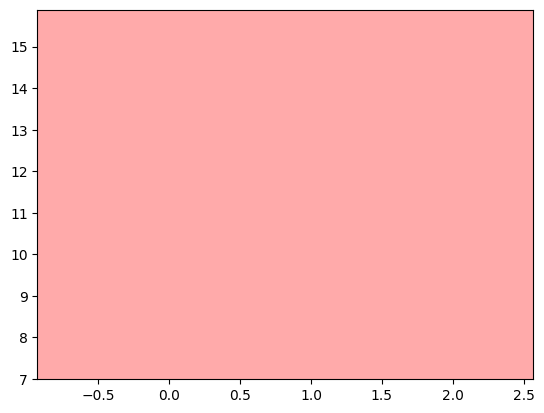

In [17]:
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

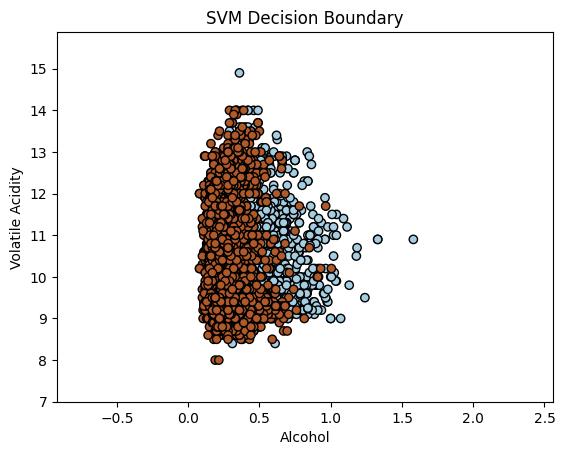

In [18]:
# Plot also the training points
plt.scatter(X_train[:, 1], X_train[:, 10], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('SVM Decision Boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [ ]:
# svm_y_pred = svm_model.predict(X_test)
# print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
# print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))

